In [1]:
import scanpy as sc
import infercnvpy as cnv

sc.set_figure_params(figsize=(4, 4))
import numpy as np

In [2]:
adata = sc.read_h5ad(
    "../../data/40_dorothea_progeny/40_primary_tumor_dorothea_progeny.h5ad"
)

In [3]:
adata_m = sc.read_h5ad(
    "../../data/50_myeloid_cells/20_cell_type_annotation/adata_annotated.h5ad"
)

In [40]:
pathways_of_interest = [
    f"PW:{x}" for x in ["JAK-STAT", "VEGF", "PI3K", "NFkB", "Trail", "TNFa"]
]
tfs_of_interest = [
    f"TF:{tf}" for tf in ["SPI1", "NFKB1", "STAT1", "MYC", "E2F4", "E2F2", "ZNF263"]
]

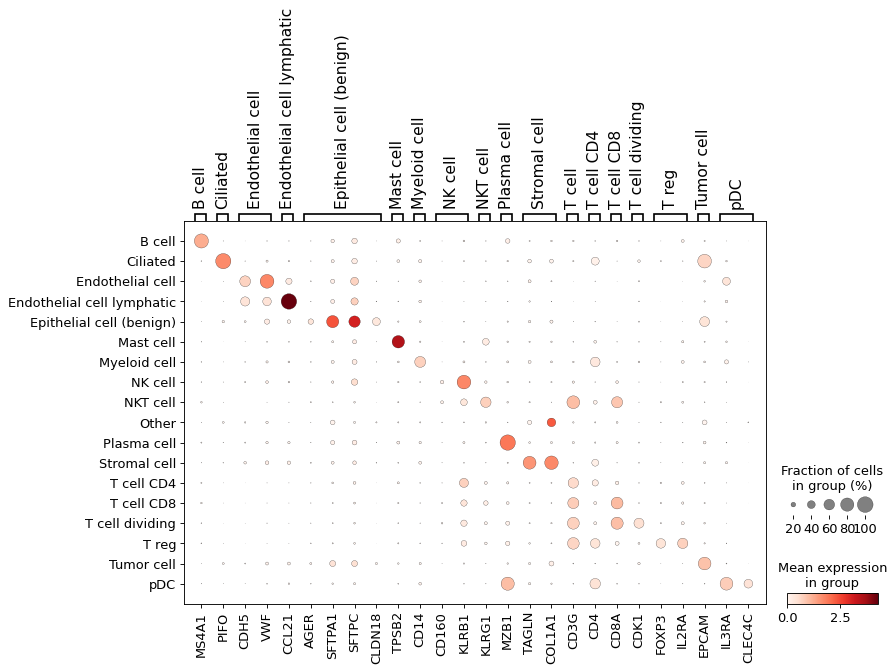

In [4]:
sc.pl.dotplot(
    adata,
    groupby="cell_type_coarse",
    var_names={
        "B cell": ["MS4A1"],
        "Ciliated": ["PIFO"],
        "Endothelial cell": ["CDH5", "VWF"],
        "Endothelial cell lymphatic": ["CCL21"],
        "Epithelial cell (benign)": ["AGER", "SFTPA1", "SFTPC", "CLDN18"],
        "Mast cell": ["TPSB2"],
        "Myeloid cell": ["CD14"],
        "NK cell": ["CD160", "KLRB1"],
        "NKT cell": ["KLRG1"],
        "Plasma cell": ["MZB1"],
        "Stromal cell": ["TAGLN", "COL1A1"],
        "T cell": ["CD3G"],
        "T cell CD4": ["CD4"],
        "T cell CD8": ["CD8A"],
        "T cell dividing": ["CDK1"],
        "T reg": ["FOXP3", "IL2RA"],
        "Tumor cell": ["EPCAM"],
        "pDC": ["IL3RA", "CLEC4C"],
    },
)

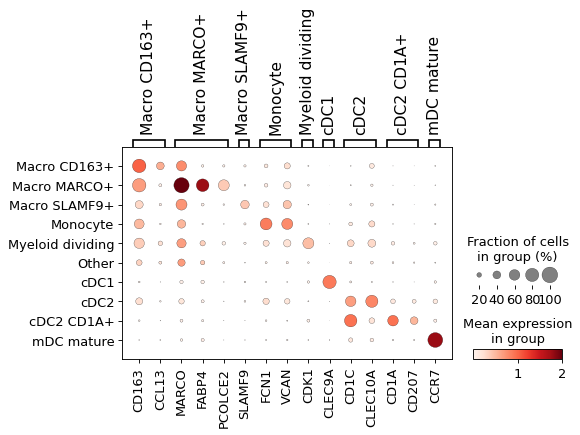

In [5]:
sc.pl.dotplot(
    adata_m,
    groupby="cell_type",
    var_names={
        "Macro CD163+": ["CD163", "CCL13"],
        "Macro MARCO+": ["MARCO", "FABP4", "PCOLCE2"],
        "Macro SLAMF9+": ["SLAMF9"],
        "Monocyte": ["FCN1", "VCAN"],
        "Myeloid dividing": ["CDK1"],
        "cDC1": ["CLEC9A"],
        "cDC2": ["CD1C", "CLEC10A"],
        "cDC2 CD1A+": ["CD1A", "CD207"],
        "mDC mature": ["CCR7"],
    },
)

In [6]:
adata_m

AnnData object with n_obs × n_vars = 15817 × 17567
    obs: 'sample', 'patient', 'tissue', 'origin', 'condition', 'dataset', 'sex', 'cell_type', 'batch', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'cell_type_predicted', 'cnv_leiden', 'cnv_score', 'leiden', 'is_malignant', 'cell_type_coarse', 'PW:JAK-STAT', 'PW:VEGF', 'PW:PI3K', 'PW:NFkB', 'PW:Trail', 'PW:TNFa', 'TF:SPI1', 'TF:NFKB1', 'TF:STAT1', 'TF:MYC', 'TF:E2F4', 'TF:E2F2', 'TF:ZNF263', 'n_genes', 'singler_macrophages', 'singler_mono', 'singler_m1', 'singler_m2', 'singler_labels', 'xcell Myeloid dendritic cell activated', 'xcell Myeloid dendritic cell', 'xcell Macrophage', 'xcell Macrophage M1', 'xcell Macrophage M2', 'xcell Monocyte', 'xcell Plasmacytoid dendritic cell', 'cibersort Monocyte', 'cibersort Macrophage M0', 'cibersort Macrophage M1', 'cibersort Macrophage M2', 'cibersort Myeloid dendritic cell resting', 'cibersort Myeloid dendritic cell activated'
    var: 'chromosome', 'start', 'end', 'ge

## TF plots (all cell_types)

In [7]:
adata_progeny = sc.AnnData(
    X=adata.obsm["progeny"], obs=adata.obs.loc[:, ["cell_type_coarse"]]
)

/data/scratch/sturm/conda/envs/2021-nsclc_heterogeneity-scanpy/lib/python3.8/site-packages/scanpy/plotting/_matrixplot.py:222: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  __ = ax.pcolor(_color_df, **kwds)


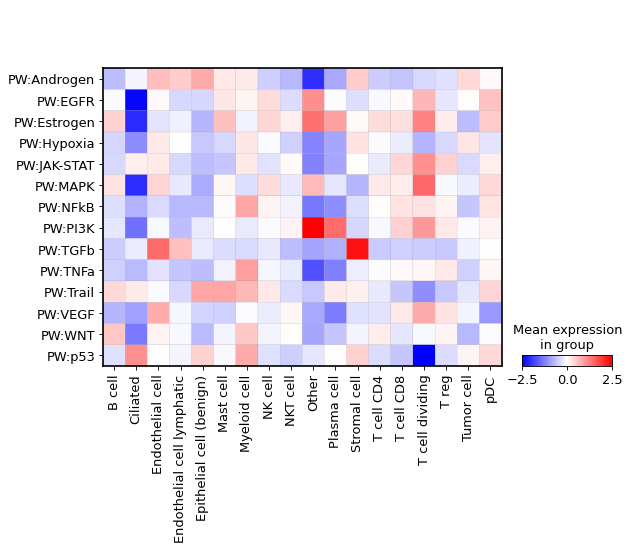

In [8]:
sc.pl.matrixplot(
    adata_progeny,
    var_names=adata_progeny.var_names,
    groupby="cell_type_coarse",
    cmap="bwr",
    swap_axes=True,
    vmin=-2.5,
    vmax=2.5,
)

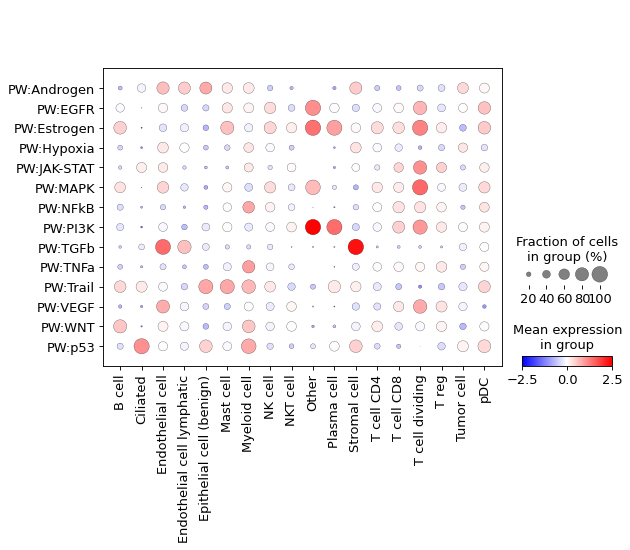

In [9]:
sc.pl.dotplot(
    adata_progeny,
    var_names=adata_progeny.var_names,
    groupby="cell_type_coarse",
    cmap="bwr",
    swap_axes=True,
    vmin=-2.5,
    vmax=2.5,
)

In [42]:
adata_dorothea = sc.AnnData(
    X=adata.obsm["dorothea"], obs=adata.obs.loc[:, ["cell_type_coarse"]]
)

/data/scratch/sturm/conda/envs/2021-nsclc_heterogeneity-scanpy/lib/python3.8/site-packages/scanpy/plotting/_matrixplot.py:222: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  __ = ax.pcolor(_color_df, **kwds)


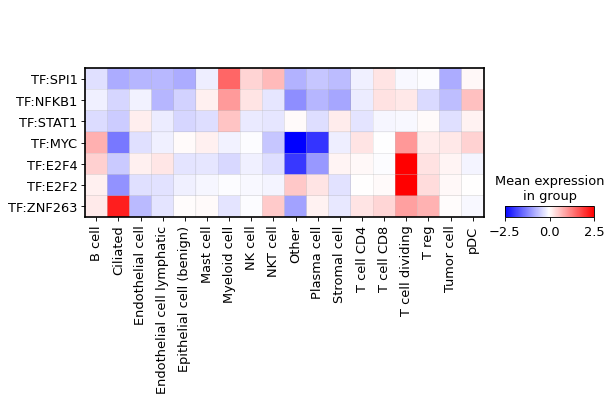

In [43]:
sc.pl.matrixplot(
    adata_dorothea,
    var_names=tfs_of_interest,
    groupby="cell_type_coarse",
    cmap="bwr",
    swap_axes=True,
    vmin=-2.5,
    vmax=2.5,
)

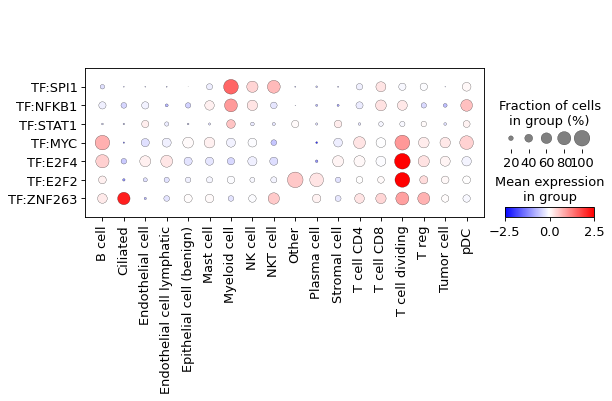

In [44]:
sc.pl.dotplot(
    adata_dorothea,
    var_names=tfs_of_interest,
    groupby="cell_type_coarse",
    cmap="bwr",
    swap_axes=True,
    vmin=-2.5,
    vmax=2.5,
)

/data/scratch/sturm/conda/envs/2021-nsclc_heterogeneity-scanpy/lib/python3.8/site-packages/scanpy/plotting/_matrixplot.py:222: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  __ = ax.pcolor(_color_df, **kwds)


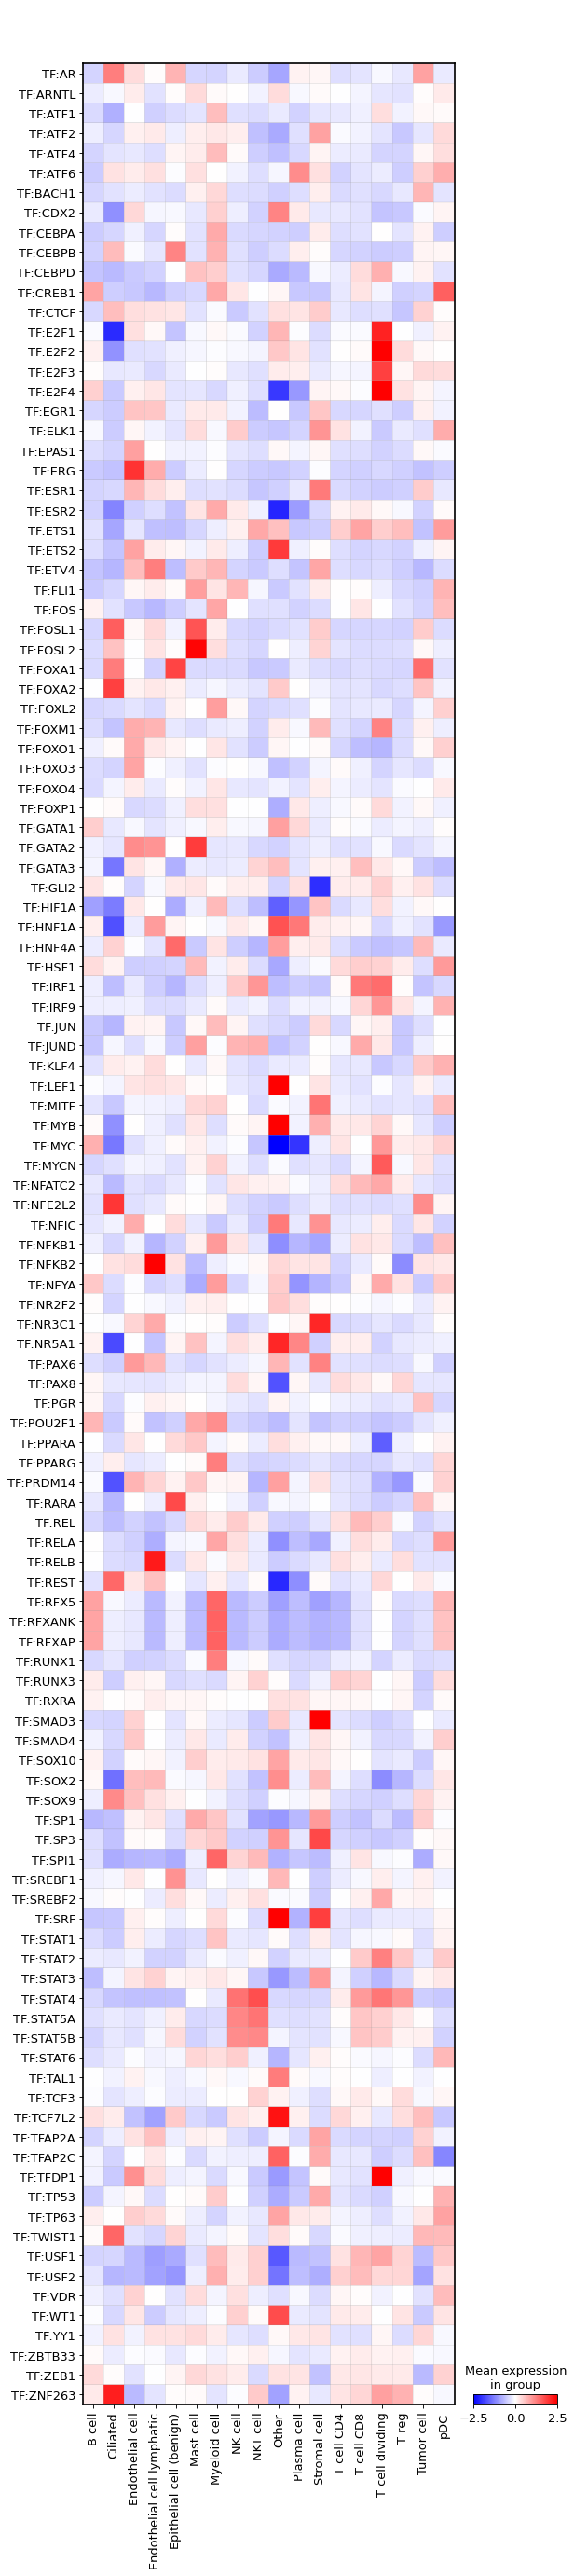

In [11]:
sc.pl.matrixplot(
    adata_dorothea,
    var_names=adata_dorothea.var_names,
    groupby="cell_type_coarse",
    cmap="bwr",
    swap_axes=True,
    vmin=-2.5,
    vmax=2.5,
)

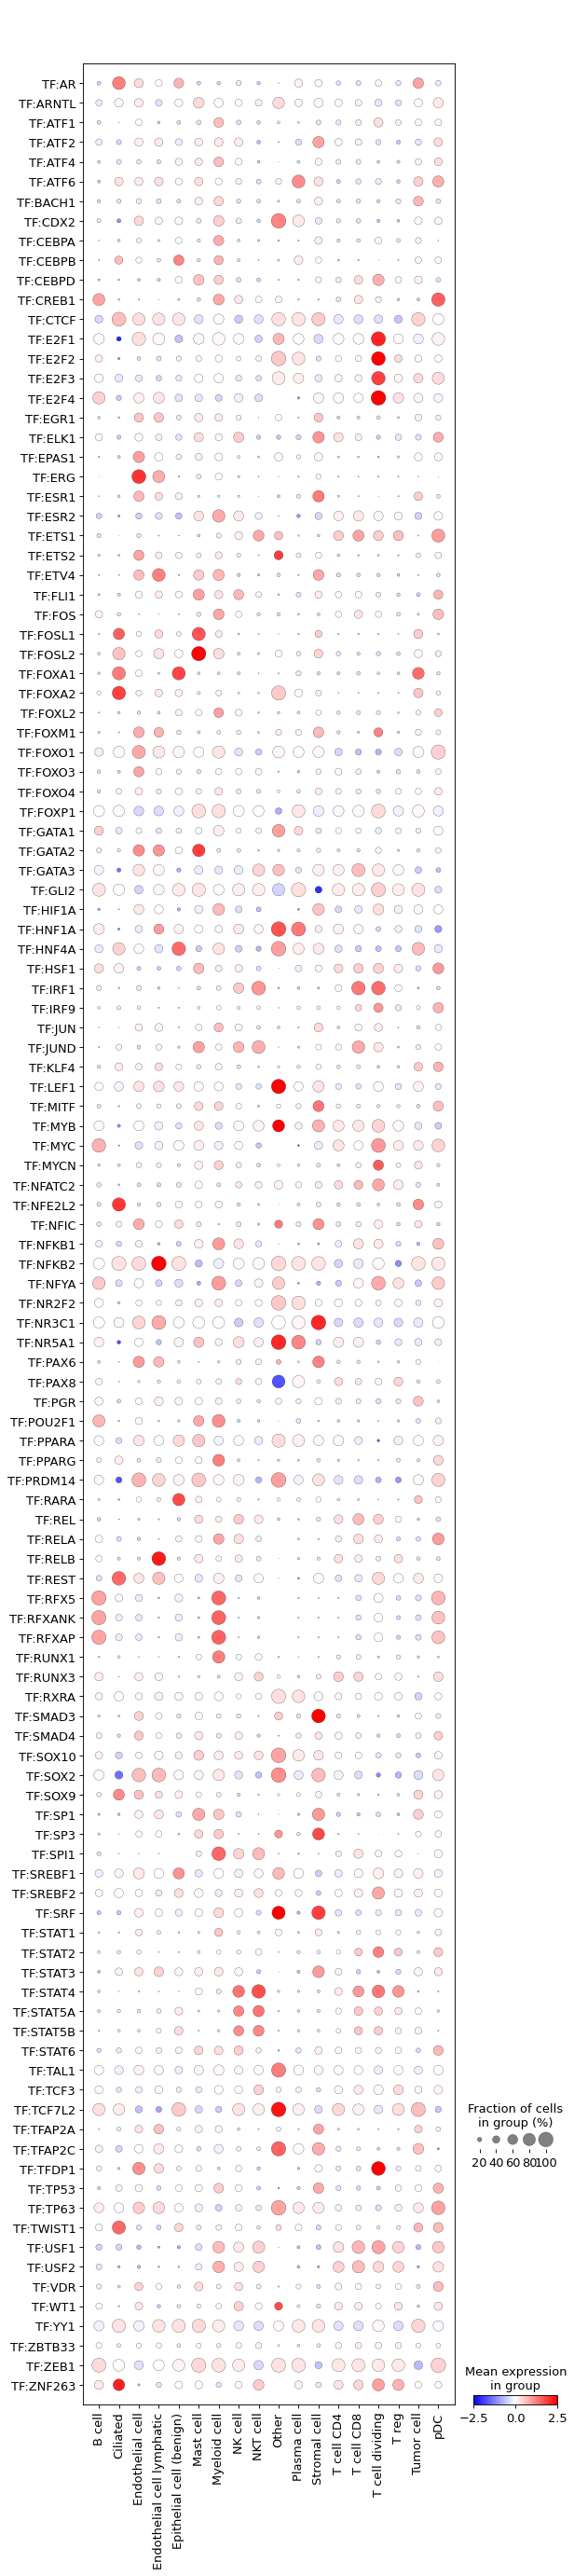

In [12]:
sc.pl.dotplot(
    adata_dorothea,
    var_names=adata_dorothea.var_names,
    groupby="cell_type_coarse",
    cmap="bwr",
    swap_axes=True,
    vmin=-2.5,
    vmax=2.5,
)

## TF plots

In [13]:
adata_progeny = sc.AnnData(
    X=adata_m.obsm["progeny"], obs=adata_m.obs.loc[:, ["cell_type"]]
)

/data/scratch/sturm/conda/envs/2021-nsclc_heterogeneity-scanpy/lib/python3.8/site-packages/scanpy/plotting/_matrixplot.py:222: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  __ = ax.pcolor(_color_df, **kwds)


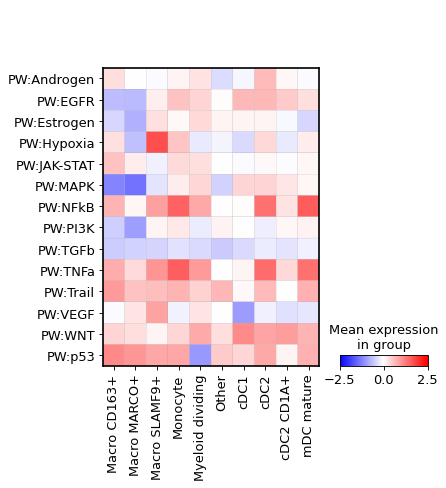

In [14]:
sc.pl.matrixplot(
    adata_progeny,
    var_names=adata_progeny.var_names,
    groupby="cell_type",
    cmap="bwr",
    swap_axes=True,
    vmin=-2.5,
    vmax=2.5,
)

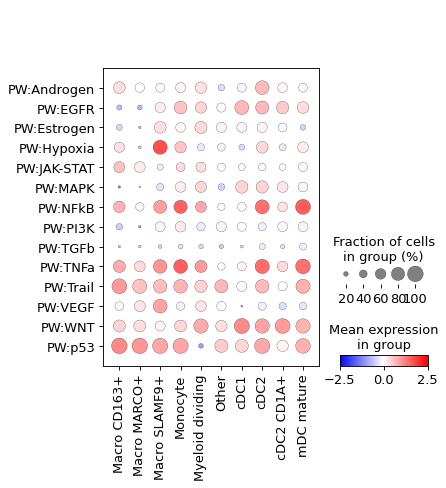

In [15]:
sc.pl.dotplot(
    adata_progeny,
    var_names=adata_progeny.var_names,
    groupby="cell_type",
    cmap="bwr",
    swap_axes=True,
    vmin=-2.5,
    vmax=2.5,
)

In [45]:
adata_dorothea = sc.AnnData(
    X=adata_m.obsm["dorothea"], obs=adata_m.obs.loc[:, ["cell_type"]]
)

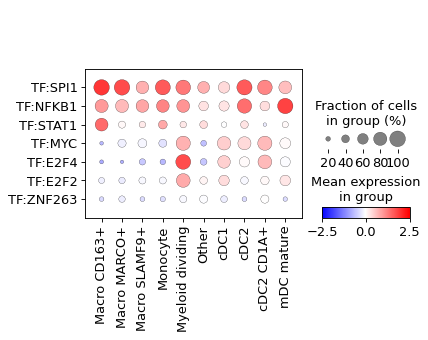

In [47]:
sc.pl.dotplot(
    adata_dorothea,
    var_names=tfs_of_interest,
    groupby="cell_type",
    cmap="bwr",
    swap_axes=True,
    vmin=-2.5,
    vmax=2.5,
)

/data/scratch/sturm/conda/envs/2021-nsclc_heterogeneity-scanpy/lib/python3.8/site-packages/scanpy/plotting/_matrixplot.py:222: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  __ = ax.pcolor(_color_df, **kwds)


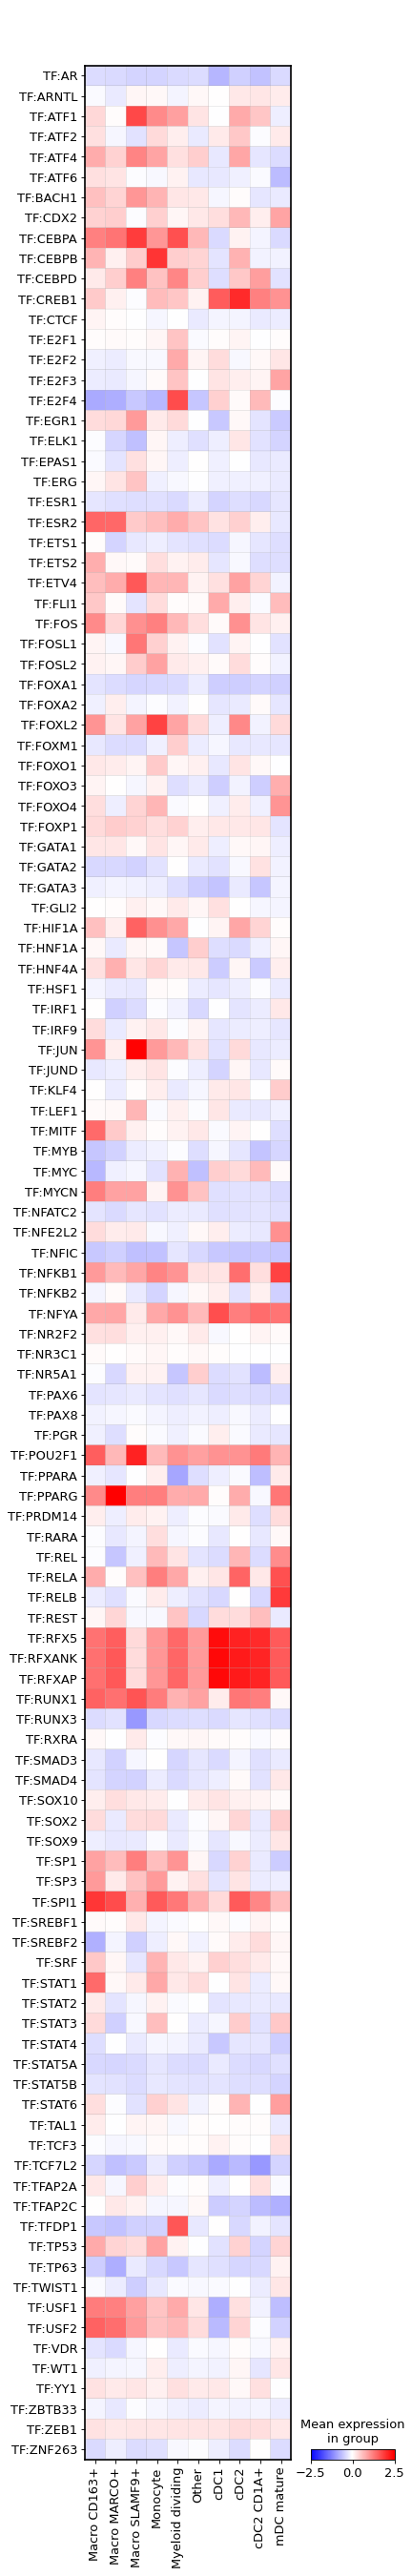

In [17]:
sc.pl.matrixplot(
    adata_dorothea,
    var_names=adata_dorothea.var_names,
    groupby="cell_type",
    cmap="bwr",
    swap_axes=True,
    vmin=-2.5,
    vmax=2.5,
)

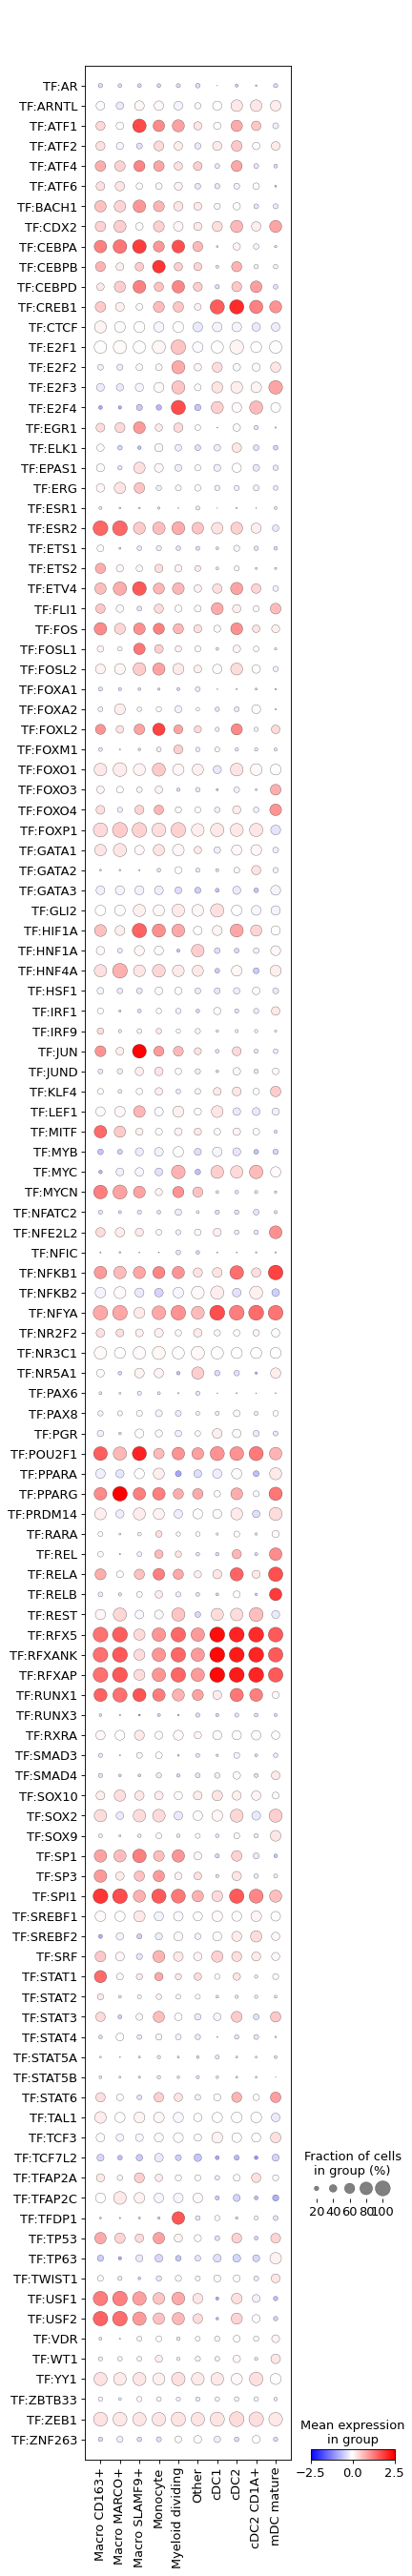

In [18]:
sc.pl.dotplot(
    adata_dorothea,
    var_names=adata_dorothea.var_names,
    groupby="cell_type",
    cmap="bwr",
    swap_axes=True,
    vmin=-2.5,
    vmax=2.5,
)

## Experiments with paga

In [19]:
adata_dc = adata_m[adata_m.obs["cell_type"].str.contains("DC"), :].copy()

/data/scratch/sturm/conda/envs/2021-nsclc_heterogeneity-scanpy/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [20]:
sc.pp.neighbors(adata_dc, use_rep="X_scVI")

In [21]:
sc.tl.diffmap(adata_dc)

In [22]:
sc.pp.neighbors(adata_dc, use_rep="X_diffmap")

In [23]:
sc.tl.leiden(adata_dc, resolution=0.5)

In [24]:
sc.tl.umap(adata_dc)

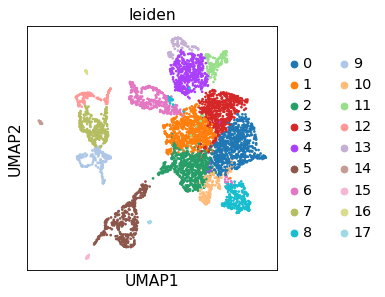

In [25]:
sc.pl.umap(adata_dc, color=["leiden"])

In [26]:
sc.tl.paga(adata_dc, groups="leiden")

In [27]:
adata_dc.uns["iroot"] = np.flatnonzero(adata_dc.obs["cell_type"] == "cDC2")[0]
sc.tl.dpt(adata_dc)

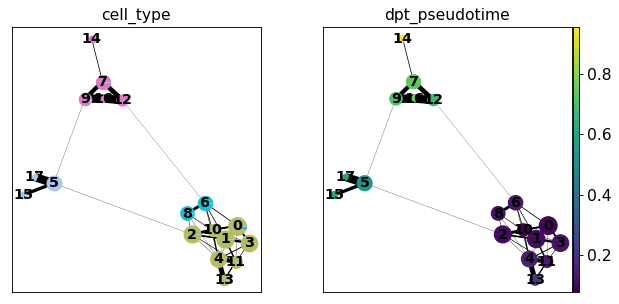

In [28]:
sc.pl.paga(adata_dc, color=["cell_type", "dpt_pseudotime"])

In [29]:
sc.tl.umap(adata_dc, init_pos="paga")

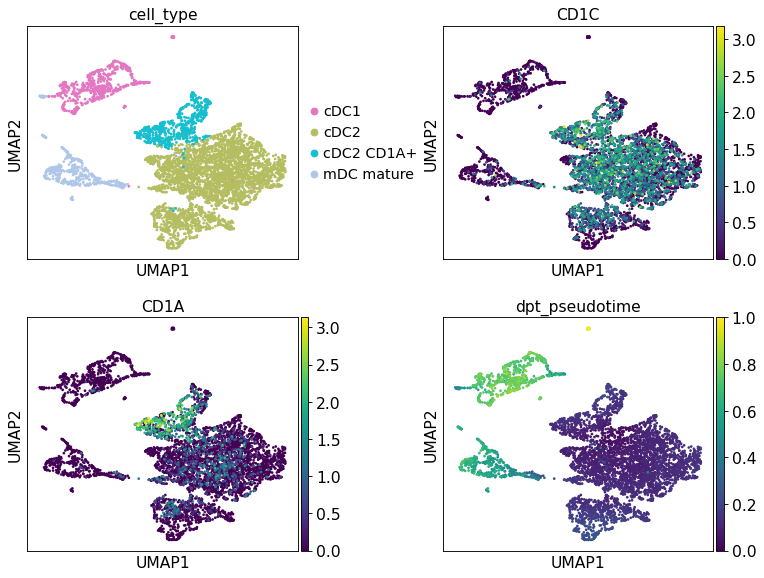

In [30]:
sc.pl.umap(
    adata_dc, color=["cell_type", "CD1C", "CD1A", "dpt_pseudotime"], wspace=0.4, ncols=2
)

In [31]:
sc.tl.draw_graph(adata_dc, init_pos="paga")

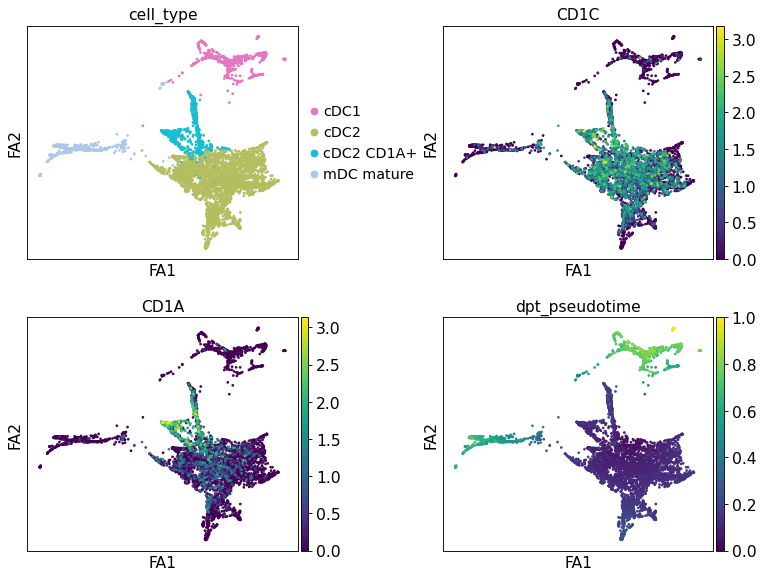

In [32]:
sc.pl.draw_graph(
    adata_dc, color=["cell_type", "CD1C", "CD1A", "dpt_pseudotime"], wspace=0.4, ncols=2
)

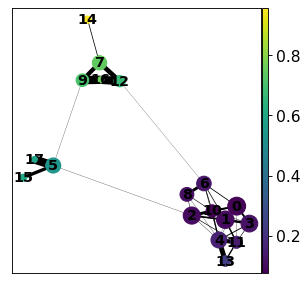

In [33]:
sc.pl.paga(adata_dc, color="dpt_pseudotime")